In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [235]:
df = pd.read_excel('stats.xlsx')
df

,Unnamed: 0,Longitude,Latitude,r_djf,p_djf,r_mam,p_mam,r_jja,p_jja
0,"Franklin, WV",79.33806,38.63556,0.122266,0.446335,-0.101349,0.528363,0.301262,0.055607
1,"Petersburg, WV",79.17611,38.99111,0.069181,0.667346,-0.158334,0.322793,0.350161,0.024809
2,"Brandywine, WV",79.24667,38.63139,0.047936,0.765994,-0.153306,0.338590,0.160504,0.316120
3,"Stokesville, VA",79.23917,38.33500,0.203775,0.201284,-0.103084,0.521287,0.144451,0.367552
4,"Bacova, VA",79.88167,38.04222,0.146591,0.360420,-0.185549,0.245452,0.179389,0.261753
...,...,...,...,...,...,...,...,...,...
126,"Rainbow Springs, NC",83.61861,37.12750,0.155556,0.331462,0.014908,0.926294,0.291928,0.064024
127,"Birdtown, NC",83.35361,35.46139,0.124489,0.438049,-0.073718,0.646914,0.386180,0.012636
128,"Cleveland, VA",82.15500,36.94472,0.296962,0.059368,0.126184,0.431788,0.281193,0.074919
129,"Jonesville, VA",83.09500,36.66194,0.349488,0.025106,0.075017,0.641112,0.350151,0.024813


In [146]:
df.index = df['Unnamed: 0']
df = df.drop('Unnamed: 0', axis=1)
df = df.astype('float')
df

,Longitude,Latitude,r_djf,p_djf,r_mam,p_mam,r_jja,p_jja
Unnamed: 0,,,,,,,,
"Franklin, WV",79.33806,38.63556,0.122266,0.446335,-0.101349,0.528363,0.301262,0.055607
"Petersburg, WV",79.17611,38.99111,0.069181,0.667346,-0.158334,0.322793,0.350161,0.024809
"Brandywine, WV",79.24667,38.63139,0.047936,0.765994,-0.153306,0.338590,0.160504,0.316120
"Stokesville, VA",79.23917,38.33500,0.203775,0.201284,-0.103084,0.521287,0.144451,0.367552
"Bacova, VA",79.88167,38.04222,0.146591,0.360420,-0.185549,0.245452,0.179389,0.261753
...,...,...,...,...,...,...,...,...
"Rainbow Springs, NC",83.61861,37.12750,0.155556,0.331462,0.014908,0.926294,0.291928,0.064024
"Birdtown, NC",83.35361,35.46139,0.124489,0.438049,-0.073718,0.646914,0.386180,0.012636
"Cleveland, VA",82.15500,36.94472,0.296962,0.059368,0.126184,0.431788,0.281193,0.074919


In [276]:
sig_df = df.loc[df['p_djf'] < .05]

In [206]:
transform = ccrs.PlateCarree()

In [211]:
def map_features():
    ax.set_extent([-85,-78, 33, 40], crs=transform)
    ax.add_feature(cfeature.STATES, linewidth = 0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), linewidth=0.5)
    
    return ax

Text(0.53, 0.9, 'DJF Arctic Sea Ice Extent vs JJA Streamflow')

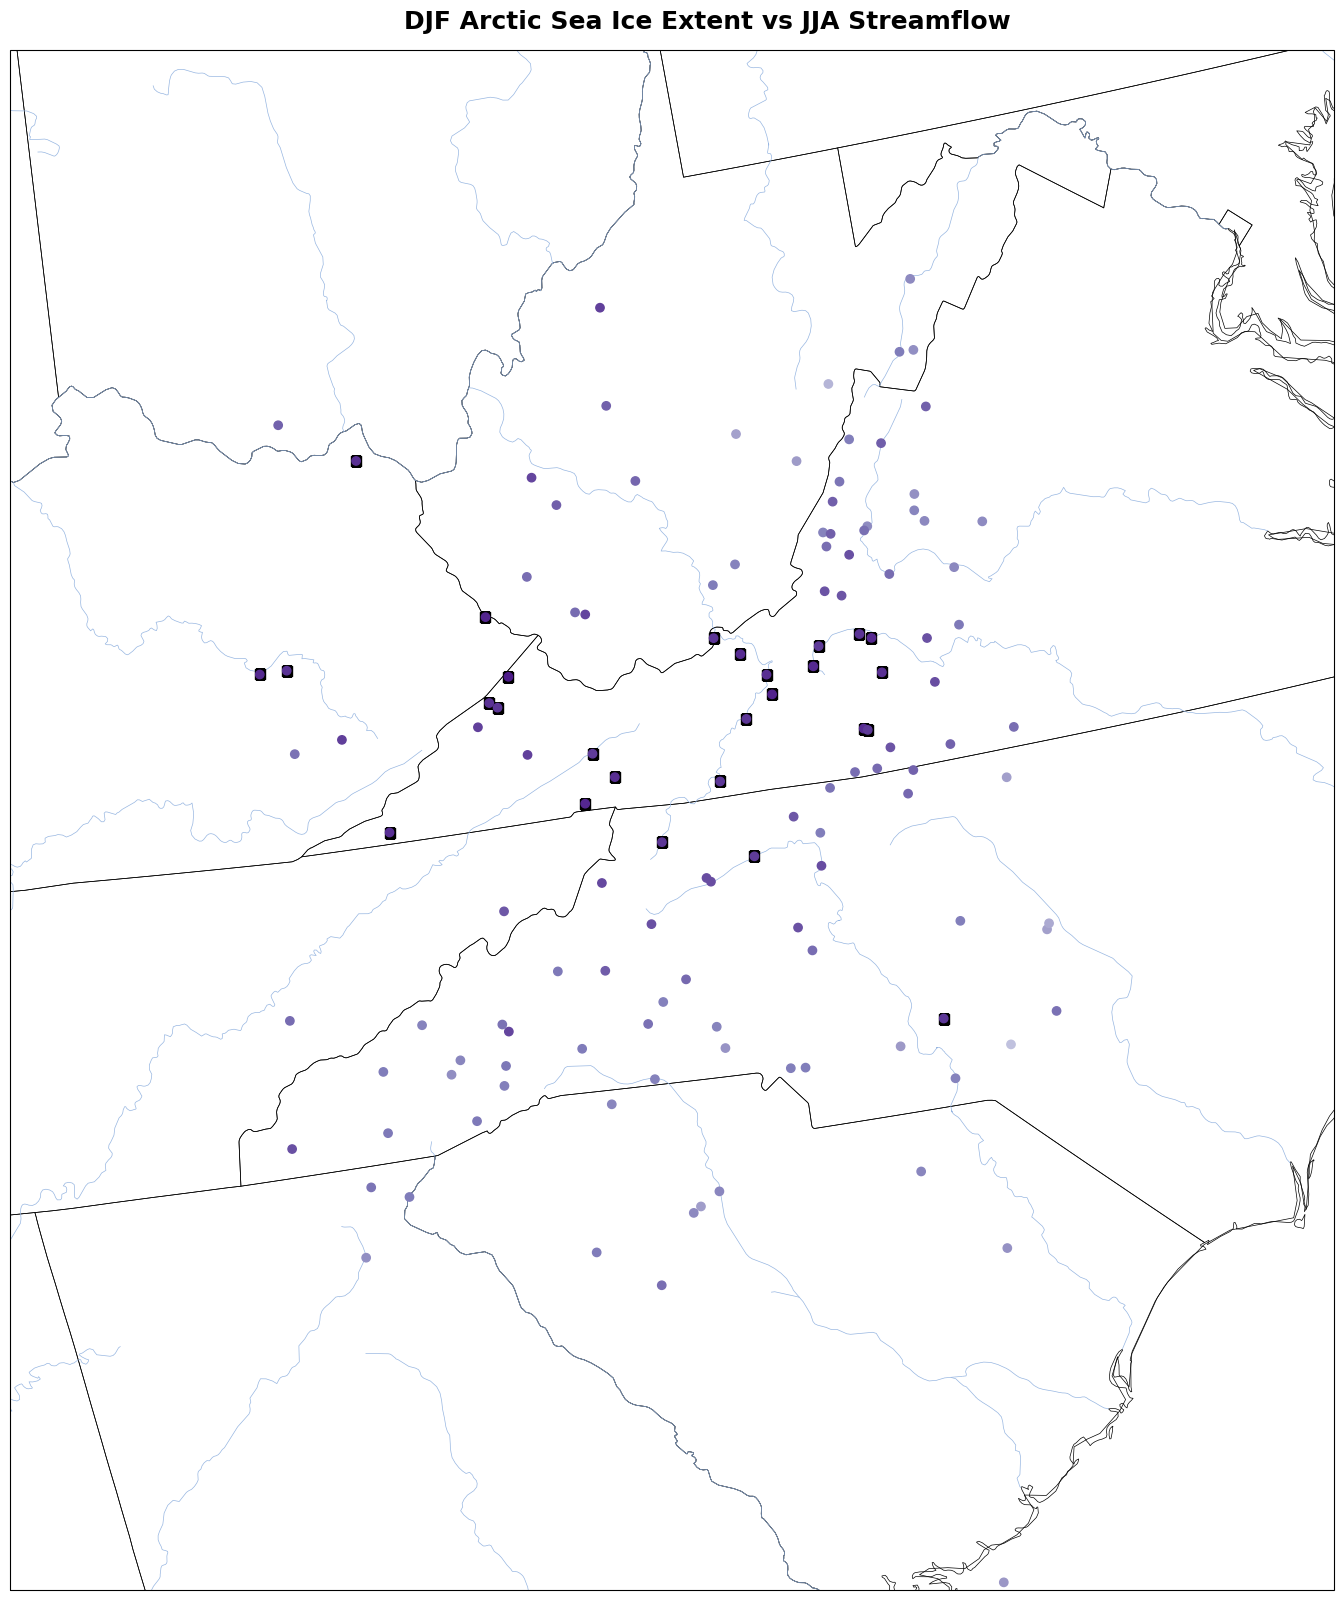

In [278]:
x = df['Longitude'].to_list()
x = [-x for x in x]
x_sig = sig_df['Longitude'].to_list()
x_sig = [-x for x in x_sig]

proj = ccrs.LambertConformal(central_latitude=37.5, central_longitude=-95, standard_parallels=(30,60))
fig = plt.figure(figsize = (20,20), facecolor = 'white')
ax = plt.subplot(1,1,1, projection=proj)
map_features()

ax.scatter(x, df['Latitude'], transform = datacrs, marker = 'o', c = df['r_djf'], vmin=-0.5, vmax=0.5, cmap = 'Purples', zorder = 10)
ax.scatter(x_sig, sig_df['Latitude'], transform = datacrs, marker = 's', c='black', s=50, zorder = 1)
fig.suptitle('DJF Arctic Sea Ice Extent vs JJA Streamflow', x = 0.53, y = 0.9, fontsize = 18, weight = 'bold')

t2 = plt.text(0.62, 0.01, 'Created by Christian Walker | Data Source: NWS SPC', transform=ax.transAxes, fontsize=20)
t2.set_bbox(dict(facecolor='white', alpha=1, edgecolor='none'))